In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math as mt
from joblib import Parallel, delayed
import time
import multiprocessing as mp



In [2]:
print(mp.cpu_count())

4


In [3]:
ve1 = np.zeros(shape=(1,3,5))
b1 = np.array([[1,2,3,4,5],[1,2,3,44,5],[1,3,3,4,4]])

b1 = b1.reshape(1,3,5)
b1 = np.append(b1, np.array([[1,2,3,4,5],[1,2,3,4,5],[1,3,3,4,4]]).reshape(1,3,5),axis=0)
b1 = np.delete(b1,0)
print(b1)


#ve1 = np.append(ve1,b1,axis=0)


[ 2  3  4  5  1  2  3 44  5  1  3  3  4  4  1  2  3  4  5  1  2  3  4  5
  1  3  3  4  4]


In [4]:
def pos(x,y):
    return np.array([x,y])
print(-4.713579828527527E+07)

-47135798.28527527


In [5]:
anga = np.array([])
np.append(anga,3)

print(anga)

[]


In [6]:
def accn(n,G,rs2,r,mass):
    ff = np.zeros(shape=(3,n))
    #epot = np.zeros(shape=(2,n))
    
    for i in range(n-1):
        for j in range(i+1,n):
            diff = r[:,j] - r[:,i]
            
            dr1 = np.sqrt(np.dot(diff,diff) + rs2)
            dr2 = np.power(dr1,3.0)
            #if i==2 or j==2:
            #    dr1 = np.sqrt(np.dot(diff,diff) + 0.00)
            #    dr2 = np.power(dr1,3.0)
            ff[:,i] = ff[:,i] + (G*mass[:,j]*diff)/dr2
            ff[:,j] = ff[:,j] - (G*mass[:,i]*diff)/dr2
       
            
            
    for i in range(n):
        
        ff[:,i] = ff[:,i]
    
    return ff[0,:], ff[1,:], ff[2,:]

In [8]:
def leap_kdk(n,G,tm,dt,rs2):
    mass = np.zeros(shape=(1,n))
    r = np.zeros(shape=(3,n))
    v = np.zeros(shape=(3,n))
    
    f = np.zeros(shape=(3,n))
    
    ang = np.zeros(shape=(1,n))
    #anga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))
    anga = np.zeros(shape=(1,1,n))
    
    rmag = np.zeros(shape=(1,n))
    #rmaga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))
    rmaga = np.zeros(shape=(1,1,n))

    vmag = np.zeros(shape=(1,n))
    #vmaga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))
    vmaga = np.zeros(shape=(1,1,n))

    #rl = np.zeros(shape=(len(np.arange(0,tm,dt)),3,n))
    rl = np.zeros(shape=(1,3,n))
    #vl = np.zeros(shape=(len(np.arange(0,tm,dt)),3,n))
    vl = np.zeros(shape=(1,3,n))
    time=[]
    
   
    
    
    
    #Earth-Moon-Sat
    #r[:,:] = [[ 0,  384400,0],[\
    #           0,0,0],[ 0,  0,0]]
    #mass[:,:] = [5.97219e24,7.349e22,0]
    #v[:,:] = [[0,0,0],[0,\
    #          np.sqrt(6.67e-11*mass[:,0]/np.power(np.linalg.norm([384400000,0]),1.0) )/1000,\
    #                   0],[0,   0,0]]
    rad = 1
    numn = 2
    dxl = rad/numn
    rs2 = (rs2*0.1)**2
    rho=1
    G=39.441
    tff = mt.sqrt(3*mt.pi/(32*G*rho))
    
    npp =0
    for i in np.arange(-numn,numn,0.2):
                for j in np.arange(-numn,numn,0.2):
                    for k in np.arange(-numn,numn,0.2):
                        #rlen = [(2*i-numn-1)*dxl,(2*j-numn-1)*dxl,(2*k-numn-1)*dxl]
                        rlen = [i,j,k]
                        if ( (np.linalg.norm(rlen)<=rad  )  ):
                            r[:,npp] = np.array(rlen)
                            v[:,npp] = np.array([0,0,0])
                            mass[:,npp] = 8*rho*0.1**3
                            npp =npp+1
    print(r.shape)
    mtot=0
    pos0=np.zeros(shape=(1,3))
    vel0=np.zeros(shape=(1,3))
    
    for i in range(n):
        pos0 = pos0 + r[:,i]*mass[:,i]
        
        vel0 = vel0 + v[:,i]*mass[:,i]
        mtot = mtot + mass[:,i]
    
    pos0 = pos0/mtot
    vel0 = vel0/mtot
  
    

    for i in range(n):
        
        r[:,i] = r[:,i] - pos0
        v[:,i] = v[:,i] - vel0

    j=0
   
    accs = accn(n,G,rs2,r,mass)
    
    time.append(j)
    f[0,:] = accs[0]
    f[1,:] = accs[1]
    f[2,:] = accs[2]
   
  
   

    #dt0 = dt
    dt0 = dt*100
    count = 0
    #for j in np.arange(0,tm,dt):
    
    
    while j < tm:
        accmax=0
        for i in range(n):
            accmax = np.maximum(accmax,np.dot(f[:,i],f[:,i]))
            
        dt=dt0/np.sqrt(accmax)
        if (dt<1e-5):
            dt = dt*40
        print(np.sqrt(accmax))
        #dt = dt0
        j = j+dt
        print(j)
        for i in range(n):
            
            
            
            v[:,i] +=   dt*(f[:,i])*0.5
            
            r[:,i] += (v[:,i])*dt
       
        #a_pool = multiprocessing.Pool()
        #result = a_pool.map(sum_up_to, range(10))
        #accs = Parallel(n_jobs=2)(delayed(accn)(n, G, rs2, r, mass))
        #pool = mp.Pool()
        #pool = mp.Pool(processes=4)
        #accs = pool.map(accn,(n,G,rs2,r,mass))
      
        #print(accs)
        #accs.start()
 
        accs = accn(n,G,rs2,r,mass)
        f[0,:] = accs[0]
        f[1,:] = accs[1]
        f[2,:] = accs[2]
        
        
        for i in range(n):  
            
            v[:,i] +=   dt*(f[:,i])*0.5
        

            ang[:,i] = 2*np.linalg.norm(np.cross(r[:,i],v[:,i])/2)
            
            rmag[:,i] = np.linalg.norm(r[:,i])
            vmag[:,i] = np.dot(r[:,i],v[:,i])/rmag[:,i]
        
        ang = ang.reshape((1,1,n))
        anga = np.append(anga,ang,axis=0)
       
        
        
        rmag = rmag.reshape((1,1,n))  
        rmaga = np.append(rmaga,rmag,axis=0)
            
            
            #if count>3 and vmag<vmaga[count-1,:,i]:
            #    vmag =- vmag
            
            #elif r[0,i]<0 and r[1,i]>0:
        
        #    vmag = -vmag
        vmag = vmag.reshape((1,1,n))  
        vmaga = np.append(vmaga,vmag,axis=0)
        
        r = r.reshape((1,3,n)) 
        v = v.reshape((1,3,n)) 
        rl = np.append(rl,r,axis=0)
        vl = np.append(vl,v,axis=0)
       
            #pot[count,:,i] =-G*Ms/np.power(  np.sqrt(np.dot(r[:,i],r[:,i]) + rs2) ,1.0)
        r = r.reshape((3,n)) 
        v = v.reshape((3,n)) 
        vmag = vmag.reshape((1,n))
        rmag = rmag.reshape((1,n))
        ang = ang.reshape((1,n))
        #eng = (Me*np.dot(v,v)/2) - G*Me*Ms/(np.linalg.norm(r))
        #rx.append(r[0])
        #ry.append(r[1])
        time.append(j)
        #energy.append(eng)
        count += 1
        #dt0 = dt*np.power(10,int(np.log10(np.sqrt(accmax)))+1)
        print(j)


    time = np.array(time)
    #energy = np.array(energy)/10e33

    return rl,vl,rmaga,vmaga,anga,time


In [9]:
nbody = leap_kdk(506,39.441,80*24*60*60/3.154e7,0.5*24*60*60/3.154e7,0.05)


(3, 506)
148.54439787276743
0.0009220740082185842
0.0009220740082185842
148.564680011646
0.001844022134342652
0.001844022134342652
148.62554583957345
0.0027655926999626645
0.0027655926999626645
148.72703698848932
0.0036865343869510194
0.0036865343869510194
148.86921178601935
0.004606596545551243
0.004606596545551243
149.05214526711842
0.005525529500856884
0.005525529500856884
149.27592918576957
0.006443084856848036
0.006443084856848036
149.54067202672968
0.007359015797164235
0.007359015797164235
149.84649901730904
0.008273077381807178
0.008273077381807178
150.19355213917683
0.009185026838985184
0.009185026838985184
150.58199014017893
0.010094623851333424
0.010094623851333424
151.01198854615947
0.011001630835769577
0.011001630835769577
151.4837396727751
0.01190581321627345
0.01190581321627345
151.99745263729247
0.012806939688911147
0.012806939688911147
152.55335337035746
0.013704782478459247
0.013704782478459247
153.1516846277272
0.014599117586022023
0.014599117586022023
153.79270600195

0.07536145922866927
861.9215175363171
0.07552037036565593
0.07552037036565593
877.5327241221302
0.07567645449172881
0.07567645449172881
893.424938143907
0.07582976219839471
0.07582976219839471
909.6033016899011
0.075980343147354
0.075980343147354
926.0731136841451
0.07612824607890555
0.07612824607890555
942.839839044119
0.07627351882054513
0.07627351882054513
959.9091185106836
0.07641620829572948
0.07641620829572948
977.2867792015479
0.07655636053277996
0.07655636053277996
994.9788459434715
0.07669402067390094
0.07669402067390094
1012.9915534427264
0.07682923298428937
0.07682923298428937
1031.3313593578932
0.07696204086131372
0.07696204086131372
1050.0049583440505
0.07709248684374125
0.07709248684374125
1069.0192971427416
0.07722061262099433
0.07722061262099433
1088.3815907978067
0.07734645904241769
0.07734645904241769
1108.0993400833793
0.07747006612653945
0.07747006612653945
1128.1803502369019
0.07759147307031063
0.07759147307031063
1148.6327510971525
0.07771071825830839
0.0777107182

0.08338983223266658
6284.856307800443
0.08341162571872845
0.08341162571872845
6216.149253470235
0.08343366008803973
0.08343366008803973
6152.34013724464
0.08345592298724386
0.08345592298724386
6093.431931525422
0.08347840111285257
0.08347840111285257
6039.395141710493
0.08350108035889146
0.08350108035889146
5990.173812249412
0.0835239459605648
0.0835239459605648
5945.690721860805
0.08354698263279556
0.08354698263279556
5905.851861994967
0.08357017470255036
0.08357017470255036
5870.55028181629
0.08359350623396901
0.08359350623396901
5839.669373839223
0.0836169611454677
0.0836169611454677
5813.085666490274
0.0836405233181593
0.0836405233181593
5862.759527937339
0.08366388585378647
0.08366388585378647
5958.914746302247
0.08368687140303098
0.08368687140303098
6056.371382673815
0.08370948707827454
0.08370948707827454
6155.08781653864
0.0837317400391465
0.0837317400391465
6255.012929314099
0.08375363750441041
0.08375363750441041
6356.085029117688
0.08377518676432709
0.08377518676432709
6458.

0.08752395065008049
157223.68188129953
0.08755879754507902
0.08755879754507902
145748.11975450692
0.08759638813041917
0.08759638813041917
144731.46146979532
0.08763424276878294
0.08763424276878294
139407.34171974202
0.08767354311743181
0.08767354311743181
133046.99526123016
0.08771472222954209
0.08771472222954209
136740.08218744613
0.08775478917294416
0.08775478917294416
142254.608896886
0.0877933029137381
0.0877933029137381
152466.14308235675
0.08782923716788159
0.08782923716788159
165530.25889777168
0.08786233538913903
0.08786233538913903
179235.10693386602
0.08789290282220234
0.08789290282220234
183462.28444882092
0.08792276594720516
0.08792276594720516
179316.28251367406
0.08795331954254518
0.08795331954254518
194951.66100395998
0.08798142269953078
0.08798142269953078
182614.77681597238
0.08801142441806269
0.08801142441806269
170003.88082150914
0.08804365166550741
0.08804365166550741
156702.5811345356
0.08807861444081164
0.08807861444081164
144629.84236527144
0.08811649567641419
0.

0.09292554431816491
124890.9710536877
0.0929694126385693
0.0929694126385693
119173.93572453373
0.09301538541861125
0.09301538541861125
108522.77606123468
0.09306587027840425
0.09306587027840425
108114.21473005658
0.0931165459194148
0.0931165459194148
107076.69934987834
0.09316771258001476
0.09316771258001476
103873.55257070583
0.09322045706596145
0.09322045706596145
99372.73996074604
0.09327559046709301
0.09327559046709301
101209.68005110162
0.09332972320549345
0.09332972320549345
105129.41035019033
0.09338183761492035
0.09338183761492035
106682.4729375368
0.09343319335296184
0.09343319335296184
106152.99209703587
0.09348480524844935
0.09348480524844935
104699.3501793963
0.09353713372159088
0.09353713372159088
104057.37854280537
0.09358978503003744
0.09358978503003744
105069.37696528685
0.09364192921602237
0.09364192921602237
108116.29959967443
0.093692603879825
0.093692603879825
115844.57214951256
0.09373989791382366
0.09373989791382366
121023.33590628536
0.09378516816763686
0.0937851

0.09921558000627985
118425.04477657015
0.09926184350691128
0.09926184350691128
114879.07782320639
0.09930953502078493
0.09930953502078493
115421.35658444608
0.09935700246784955
0.09935700246784955
118871.27472312497
0.09940309230028854
0.09940309230028854
127511.28320552621
0.09944605914209319
0.09944605914209319
129881.18122654452
0.09948824198245589
0.09948824198245589
132663.94872658432
0.09952953999285274
0.09952953999285274
134696.81705929514
0.0995702147263276
0.0995702147263276
140040.46529531654
0.09960933739792288
0.09960933739792288
140238.92338347982
0.09964840470535519
0.09964840470535519
135605.29380059332
0.09968880694172993
0.09968880694172993
135563.28286371854
0.09972922169872063
0.09972922169872063
131775.8374488045
0.0997707980395724
0.0997707980395724
127480.24345136841
0.09981377534323504
0.09981377534323504
129674.10741575346
0.09985602554447401
0.09985602554447401
134948.0900593322
0.09989662454169872
0.09989662454169872
131564.17797901153
0.09993826777025804
0.0

0.1053207230471466
129802.68840115189
0.10536293139584324
0.10536293139584324
132490.54501165703
0.10540428345710404
0.10540428345710404
134220.6458666639
0.1054451024913027
0.1054451024913027
131809.58574669494
0.10548666818702021
0.10548666818702021
117854.22371675482
0.10553315576261162
0.10553315576261162
107255.15359491057
0.10558423729063302
0.10558423729063302
103460.70142132694
0.105637192248975
0.105637192248975
104995.61245374322
0.10568937306878032
0.10568937306878032
109990.2151681261
0.1057391843826815
0.1057391843826815
116761.92173652153
0.10578610684723429
0.10578610684723429
123118.33358947602
0.10583060677648176
0.10583060677648176
130071.44835473436
0.10587272791223522
0.10587272791223522
132864.43338125493
0.10591396360635116
0.10591396360635116
131523.06499361753
0.10595561985222761
0.10595561985222761
132113.8926723697
0.10599708980684763
0.10599708980684763
142877.1046725076
0.10603543574860196
0.10603543574860196
150030.0780027565
0.10607195347362572
0.106071953

0.11130477418966227
115420.79357323224
0.11135224186826839
0.11135224186826839
115566.17188942141
0.11139964983414824
0.11139964983414824
112974.91976128574
0.11144814517404647
0.11144814517404647
115692.12222481983
0.11149550152838106
0.11149550152838106
121305.25071612382
0.11154066657359925
0.11154066657359925
119109.30414889236
0.11158666429957832
0.11158666429957832
109755.41280582384
0.1116365821760068
0.1116365821760068
106974.93480674575
0.11168779751111027
0.11168779751111027
101385.18825702256
0.11174183654016359
0.11174183654016359
100408.42572501219
0.11179640125516871
0.11179640125516871
106509.9232524125
0.11184784019124619
0.11184784019124619
110438.0447063869
0.11189744951879599
0.11189744951879599
111524.58985558826
0.11194657551998453
0.11194657551998453
110723.48434095956
0.11199605695715578
0.11199605695715578
113984.86673521156
0.11204412261087564
0.11204412261087564
123306.72678709863
0.11208855455126165
0.11208855455126165
137802.9952729462
0.11212831244711106
0.

0.11756049564033559
114314.67255945076
0.11760842262128328
0.11760842262128328
115110.42433330206
0.11765601828575528
0.11765601828575528
117550.07655340675
0.11770262614254651
0.11770262614254651
121391.82108051967
0.11774775897839189
0.11774775897839189
122874.2989895323
0.1177923472867595
0.1177923472867595
123704.12989300469
0.11783663648824806
0.11783663648824806
124475.05043309946
0.11788065139014796
0.11788065139014796
133817.61538431863
0.11792159336268322
0.11792159336268322
143452.08196907231
0.11795978560819542
0.11795978560819542
154962.74673978752
0.11799514092583831
0.11799514092583831
155141.35086056328
0.11803045554120943
0.11803045554120943
155063.14207075312
0.1180657879681204
0.1180657879681204
149188.30402784285
0.11810251173925983
0.11810251173925983
150842.07329560368
0.11813883288636487
0.11813883288636487
143089.33268559346
0.11817712195397717
0.11817712195397717
139375.09608769207
0.11821643139510107
0.11821643139510107
131915.34404800468
0.11825796376704262
0.

0.12326685338085788
132167.0492876248
0.12330830665656714
0.12330830665656714
140176.64246584446
0.12334739132172548
0.12334739132172548
134381.2430942015
0.12338816157364195
0.12338816157364195
138047.83101948877
0.12342784895658261
0.12342784895658261
132361.16930694747
0.12346924143719068
0.12346924143719068
122561.10468481238
0.12351394368712461
0.12351394368712461
114602.03555610485
0.12356175049183983
0.12356175049183983
116035.6851287647
0.12360896663166543
0.12360896663166543
119271.90142446196
0.12365490165130011
0.12365490165130011
122426.77404375
0.12369965294999757
0.12369965294999757
127322.76132310322
0.12374268341114109
0.12374268341114109
132703.86064912437
0.12378396900077653
0.12378396900077653
132934.38808237205
0.12382518299523523
0.12382518299523523
135734.3067084866
0.12386554683004351
0.12386554683004351
140643.473978319
0.1239045017632432
0.1239045017632432
152576.24497910053
0.123940410086551
0.123940410086551
160258.04619494523
0.12397459718207526
0.1239745971

0.12903455357382335
161132.4187389507
0.12906855515573143
0.12906855515573143
158800.923745073
0.12910305594454669
0.12910305594454669
158869.13292571652
0.1291375419207266
0.1291375419207266
157545.3184008023
0.12917231767407433
0.12917231767407433
152218.88130200925
0.12920831029921345
0.12920831029921345
152183.52260559928
0.1292443112869682
0.1292443112869682
155090.61589526903
0.12927963745484866
0.12927963745484866
151499.18060190394
0.12931580106386642
0.12931580106386642
148931.71927426982
0.12935258810399794
0.12935258810399794
138211.8838903454
0.12939222837934608
0.12939222837934608
125023.41132765249
0.12943605022899501
0.12943605022899501
115037.0090388486
0.129483676268472
0.129483676268472
110509.64990216812
0.12953325345144784
0.12953325345144784
103769.09163881272
0.12958605103353393
0.12958605103353393
96957.1787043661
0.12964255801122254
0.12964255801122254
93160.56972095584
0.1297013678397821
0.1297013678397821
94094.53201536874
0.12975959393450248
0.129759593934502

0.13465309973036022
135278.6595538759
0.1346935995191064
0.1346935995191064
134941.96407846423
0.13473420035940994
0.13473420035940994
135417.3562122678
0.13477465866761387
0.13477465866761387
138822.21385559652
0.1348141246650334
0.1348141246650334
139523.19089867946
0.13485339238173705
0.13485339238173705
136556.29625576074
0.13489351324971618
0.13489351324971618
128867.96598758185
0.13493602774966823
0.13493602774966823
117930.61742758901
0.1349824852112953
0.1349824852112953
112078.22178437313
0.1350313685451542
0.1350313685451542
111210.23051284786
0.13508063341142176
0.13508063341142176
110549.96169213418
0.13513019251619157
0.13513019251619157
109597.87583287807
0.13518018214502484
0.13518018214502484
116311.95556794865
0.13522728613452484
0.13522728613452484
124433.81856887041
0.1352713156210166
0.1352713156210166
126594.69869772815
0.1353145935559551
0.1353145935559551
129281.34341309595
0.13535697211568504
0.13535697211568504
132337.84127545968
0.13539837189280846
0.135398371

0.14032269035044073
136591.6032124381
0.14036280084775496
0.14036280084775496
137616.37608809507
0.14040261265859855
0.14040261265859855
142012.6603719688
0.1404411920156745
0.1404411920156745
143428.20842982054
0.14047939061826306
0.14047939061826306
139835.71972287353
0.14051857057274578
0.14051857057274578
138971.31918199267
0.14055799422624526
0.14055799422624526
145065.99688868207
0.14059576156836062
0.14059576156836062
146748.0269200611
0.1406330960201334
0.1406330960201334
143565.90433504118
0.14067125798595095
0.14067125798595095
141072.72965639646
0.14071009438719692
0.14071009438719692
143399.51872499436
0.1407483006321168
0.1407483006321168
144735.87705444207
0.14078615411561582
0.14078615411561582
146329.25367097146
0.14082359541321252
0.14082359541321252
150916.41004255667
0.14085989866964602
0.14085989866964602
147671.13699349776
0.14089699973926154
0.14089699973926154
141582.54405306003
0.14093569629730435
0.14093569629730435
145068.97613490905
0.140973462863801
0.140973

0.14587639369899666
133464.95701034955
0.14591744385370786
0.14591744385370786
138755.85450610082
0.1459569287255592
0.1459569287255592
140189.49085161331
0.14599600980860272
0.14599600980860272
147941.6549440338
0.14603304303724865
0.14603304303724865
153998.74584344286
0.14606861967200493
0.14606861967200493
156624.64866193352
0.14610359984390384
0.14610359984390384
155890.50645071594
0.14613874474950803
0.14613874474950803
149609.85621345587
0.14617536504493817
0.14617536504493817
143121.4124214839
0.14621364553030441
0.14621364553030441
138674.0569607018
0.14625315369249334
0.14625315369249334
138528.4513451
0.14629270338124392
0.14629270338124392
139702.41313631268
0.14633192072195264
0.14633192072195264
140886.7939376931
0.1463708083776418
0.1463708083776418
138737.67813224156
0.146410298422506
0.146410298422506
134120.30632249103
0.14645114799468506
0.14645114799468506
132105.0990055861
0.14649262070978114
0.14649262070978114
130390.06525266245
0.1465346389197052
0.1465346389197

0.15149001323025482
149477.08135716565
0.15152666605411286
0.15152666605411286
146405.8215025771
0.15156408777052802
0.15156408777052802
145125.67054883778
0.1516018395832368
0.1516018395832368
150818.19717236268
0.15163816648036538
0.15163816648036538
149620.96561708185
0.1516747840567271
0.1516747840567271
149940.33549890373
0.15171132363839182
0.15171132363839182
152093.23971757916
0.1517473459964136
0.1517473459964136
151678.8572846237
0.1517834667665188
0.1517834667665188
149400.84606915212
0.15182013829334043
0.15182013829334043
143869.79453156042
0.15185821965122126
0.15185821965122126
136795.13798536
0.151898270468922
0.151898270468922
137579.4911593536
0.15193809295327362
0.15193809295327362
134600.11915089935
0.15197879690783445
0.15197879690783445
135235.55341814106
0.15201930960582932
0.15201930960582932
135314.97040983505
0.15205979852673146
0.15205979852673146
134421.95860251138
0.15210055642961248
0.15210055642961248
136107.78719510476
0.15214080950584496
0.1521408095058

0.15696497775330748
133699.66656742652
0.1570059558445358
0.1570059558445358
130532.01067407652
0.1570479283622769
0.1570479283622769
129104.377790602
0.15709036501103785
0.15709036501103785
127213.74891523735
0.15713343234598015
0.15713343234598015
125843.83836235249
0.15717696850321355
0.15717696850321355
127285.64748232097
0.15722001151114232
0.15722001151114232
127478.83593318002
0.15726298928932558
0.15726298928932558
135009.25670130173
0.15730356989296462
0.15730356989296462
145183.36308371264
0.1573413067039699
0.1573413067039699
144349.44391006132
0.15737926152378348
0.15737926152378348
146375.49603185704
0.1574166909930753
0.1574166909930753
148220.9406549769
0.15745365444175932
0.15745365444175932
146373.08809822993
0.15749108452679053
0.15749108452679053
143366.54439714682
0.15752929955915276
0.15752929955915276
140570.58000866696
0.15756827469273663
0.15756827469273663
138772.17736363172
0.15760775492024248
0.15760775492024248
138894.69179001523
0.15764720032354185
0.157647

0.1626162972351074
151865.0290059777
0.16265237372466962
0.16265237372466962
145970.48658124948
0.16268990704569988
0.16268990704569988
144753.43851126768
0.16272775593682223
0.16272775593682223
144966.95867054546
0.16276554908074994
0.16276554908074994
144437.33795232803
0.16280348080402504
0.16280348080402504
142887.64441342602
0.16284182391728924
0.16284182391728924
139407.3098761413
0.16288112427491516
0.16288112427491516
136535.2341697941
0.16292125133198665
0.16292125133198665
138809.3151088175
0.16296072099675304
0.16296072099675304
137423.13301983566
0.16300058879057644
0.16300058879057644
137841.510628272
0.16304033557736677
0.16304033557736677
138953.4881253854
0.16307976428986412
0.16307976428986412
137265.4457555025
0.16311967788285647
0.16311967788285647
137976.68125089793
0.16315938573119815
0.16315938573119815
136778.20122881475
0.16319944150824872
0.16319944150824872
135946.9519501001
0.16323974220683157
0.16323974220683157
136042.8330834887
0.1632800145020317
0.1632800

0.16820124518499227
152006.5515663842
0.16823728808628396
0.16823728808628396
148860.92220276973
0.1682740926220394
0.1682740926220394
147471.08154705705
0.16831124402200423
0.16831124402200423
144659.52288884603
0.1683491174853227
0.1683491174853227
143407.62205194883
0.16838732157137756
0.16838732157137756
144399.3563828445
0.16842526327188814
0.16842526327188814
141415.7188753692
0.1684640054794544
0.1684640054794544
141893.9687894077
0.1685026171074224
0.1685026171074224
141076.89523907728
0.1685414523619445
0.1685414523619445
139494.79790078462
0.16858072807126304
0.16858072807126304
137271.36669686082
0.16862063994265789
0.16862063994265789
133615.85347489995
0.16866164373817552
0.16866164373817552
127702.481008895
0.16870454624946984
0.16870454624946984
132978.79415190357
0.16874574648119656
0.16874574648119656
137540.70648891397
0.16878558019496506
0.16878558019496506
139576.07067772074
0.1688248330347047
0.1688248330347047
148419.7665931761
0.16886174696645084
0.16886174696645

0.17379491310583378
128691.95794487522
0.1738374857515631
0.1738374857515631
129405.50685646682
0.17387982364943846
0.17387982364943846
127853.67627049296
0.1739226754257316
0.1739226754257316
127221.7546621486
0.17396574005055418
0.17396574005055418
126285.32949118978
0.17400912400620344
0.17400912400620344
126383.7885189449
0.17405247416367223
0.17405247416367223
124532.2928480091
0.17409646883371724
0.17409646883371724
125983.29022822896
0.17413995680044578
0.17413995680044578
130844.51597773116
0.17418182907222468
0.17418182907222468
132437.73495404393
0.1742231976227794
0.1742231976227794
133086.72943380103
0.1742643644405163
0.1742643644405163
131855.16520167128
0.1743059157678793
0.1743059157678793
132800.88056858073
0.17434717119563203
0.17434717119563203
136949.960184349
0.1743871767358047
0.1743871767358047
141350.76618366173
0.1744259367459675
0.1744259367459675
143667.14103173904
0.17446407182051868
0.17446407182051868
146791.8173323426
0.17450139513481075
0.174501395134810

0.17952092938125638
145851.49890404436
0.1795584933224909
0.1795584933224909
145643.24612621637
0.17959611097576025
0.17959611097576025
141181.06293447176
0.17963491757644678
0.17963491757644678
136789.06504961153
0.1796749701722578
0.1796749701722578
135863.09355670682
0.179715295745527
0.179715295745527
132018.5210120965
0.17975679565850736
0.17975679565850736
129124.96365902513
0.17979922554176575
0.17979922554176575
128625.39471070816
0.17984182021870432
0.17984182021870432
127985.36875716595
0.1798846279020122
0.1798846279020122
127341.37454464957
0.1799276520734835
0.1799276520734835
123973.51822188625
0.17997184503672578
0.17997184503672578
125776.25328703239
0.1800154045878383
0.1800154045878383
123496.67562805091
0.180059768187959
0.180059768187959
132055.0831239248
0.18010125661085186
0.18010125661085186
131233.8252119352
0.180143004667231
0.180143004667231
128183.74391548365
0.18018574610203736
0.18018574610203736
133116.48580446027
0.1802269037174949
0.1802269037174949
1404

0.1850670222949467
141862.88768968548
0.18510564238243415
0.18510564238243415
140913.92056640954
0.18514452255205668
0.18514452255205668
142773.8408332112
0.1851828962282275
0.1851828962282275
141865.2546857247
0.18522151567134582
0.18522151567134582
135715.78168990568
0.18526188501576235
0.18526188501576235
134687.18737843726
0.18530256265734382
0.18530256265734382
136119.0544162481
0.18534281240163786
0.18534281240163786
137402.27770476663
0.18538268624671028
0.18538268624671028
139904.3015265106
0.18542184699497904
0.18542184699497904
143487.8212979181
0.18546002972773112
0.18546002972773112
143209.99492256317
0.1854982865347142
0.1854982865347142
143463.58495049394
0.1855364757179532
0.1855364757179532
146739.77328681096
0.18557381226966704
0.18557381226966704
151422.76901845657
0.18560999412771462
0.18560999412771462
151962.9283055788
0.18564604737566717
0.18564604737566717
157026.79209658678
0.18568093796383145
0.18568093796383145
151891.88032388347
0.1857170080758224
0.185717008

0.19065884104976658
139849.05625174835
0.19069801726790234
0.19069801726790234
139861.3363679016
0.19073719004628467
0.19073719004628467
139340.44751703469
0.19077650926214357
0.19077650926214357
141498.92130373584
0.1908152286890008
0.1908152286890008
139878.26436353664
0.19085439672671364
0.19085439672671364
133457.26162410463
0.19089544924845075
0.19089544924845075
134656.72158412114
0.19093613609326135
0.19093613609326135
136055.84503517032
0.19097640453694623
0.19097640453694623
138073.45259566925
0.19101608455530458
0.19101608455530458
134347.80478341522
0.19105686495467641
0.19105686495467641
137834.29500596627
0.19109661382221016
0.19109661382221016
136111.6960981061
0.1911368657424408
0.1911368657424408
136983.0693015873
0.19117686161318403
0.19117686161318403
137295.87953163314
0.19121676635870508
0.19121676635870508
145697.54109885864
0.19125436999355352
0.19125436999355352
147077.36500230563
0.19129162084540086
0.19129162084540086
155137.55465087827
0.1913269363249192
0.191

0.19615435410592644
162867.95736534204
0.1961879933632882
0.1961879933632882
163498.1207743993
0.1962215029663824
0.1962215029663824
158356.35774241085
0.19625610061192
0.19625610061192
152084.21798163626
0.19629212510681177
0.19629212510681177
147026.077651486
0.1963293889529356
0.1963293889529356
144643.1144317617
0.196367266712657
0.196367266712657
145096.35153912398
0.19640502615371586
0.19640502615371586
140960.97105840105
0.19644389334576667
0.19644389334576667
144248.59946778812
0.19648187469985962
0.19648187469985962
147670.11399515218
0.1965189760264962
0.1965189760264962
150452.34176849824
0.19655539125984783
0.19655539125984783
149346.8467944481
0.19659207604597753
0.19659207604597753
141943.56983315435
0.19663067418142136
0.19663067418142136
132851.95756145054
0.1966719137478859
0.1966719137478859
129057.81708619956
0.19671436570668618
0.19671436570668618
121839.61815428844
0.1967593326658477
0.1967593326658477
116159.73749613223
0.1968064983813692
0.1968064983813692
116403

0.20169077406791822
139160.09418891903
0.20173014424200247
0.20173014424200247
134874.6855756069
0.20177076533491117
0.20177076533491117
135352.52301455603
0.2018112430224472
0.2018112430224472
134875.85029927062
0.20185186376457148
0.20185186376457148
133670.72246675793
0.20189285072890215
0.20189285072890215
133702.42088470975
0.20193382797596726
0.20193382797596726
141492.1074465198
0.2019725492674419
0.2019725492674419
148711.69317845942
0.20200939073576696
0.20200939073576696
150516.80002490664
0.20204579037443116
0.20204579037443116
153131.10518878847
0.20208156858635645
0.20208156858635645
152291.41704847617
0.20211754406836313
0.20211754406836313
156155.98316128214
0.20215262922503074
0.20215262922503074
155021.55686458424
0.20218797113001874
0.20218797113001874
150724.830457691
0.2022243205298964
0.2022243205298964
146666.65014444198
0.2022616756963804
0.2022616756963804
143915.2629254174
0.20229974502288844
0.20229974502288844
140599.2721931099
0.20233871220279157
0.202338712

0.2072748278260925
135702.53831512504
0.20731520111020216
0.20731520111020216
133508.21999552113
0.20735623796271943
0.20735623796271943
134635.9822997081
0.20739693107491883
0.20739693107491883
136447.54075163137
0.2074370839212334
0.2074370839212334
133298.73513486088
0.20747818526498024
0.20747818526498024
134231.78167307164
0.20751900091285075
0.20751900091285075
135143.42444982062
0.20755954122886022
0.20755954122886022
135270.61229099592
0.20760004342694308
0.20760004342694308
135735.26521359273
0.207640406976719
0.207640406976719
137753.61054485393
0.20768017912579104
0.20768017912579104
141256.1040271572
0.2077189651108041
0.2077189651108041
148442.43228505418
0.20775587340615778
0.20775587340615778
151191.45236792756
0.20779211062094732
0.20779211062094732
152750.01656840017
0.20782797809420123
0.20782797809420123
161038.8476455734
0.20786199943261677
0.20786199943261677
164527.56879108015
0.20789529936632425
0.20789529936632425
161391.39825725465
0.2079292463870017
0.20792924

0.2128184504599884
119977.15669347128
0.2128641154622671
0.2128641154622671
124651.84079125227
0.2129080679390137
0.2129080679390137
124400.12981908547
0.21295210934911324
0.21295210934911324
124907.52447670078
0.21299597185584973
0.21299597185584973
126608.9704335325
0.21303924491237203
0.21303924491237203
129986.71854482037
0.2130813935041292
0.2130813935041292
134744.59489469693
0.21312205381512778
0.21312205381512778
139794.7489423959
0.2131612452523974
0.2131612452523974
141938.596284057
0.21319984474032552
0.21319984474032552
146730.84173350182
0.2132371835647272
0.2132371835647272
153291.78173540914
0.2132729242748408
0.2132729242748408
156211.83318205152
0.21330799688760127
0.21330799688760127
153659.2463490963
0.2133436521264754
0.2133436521264754
153448.32533625918
0.21337935637493685
0.21337935637493685
153381.35467145845
0.21341507621288935
0.21341507621288935
150609.29733430085
0.2134514534965682
0.2134514534965682
146783.30245182177
0.21348877897598093
0.21348877897598093

0.21832061689588092
135712.6742260426
0.21836098716464944
0.21836098716464944
137528.37888234816
0.2184008244489854
0.2184008244489854
143903.47642714274
0.21843889689358387
0.21843889689358387
148129.51750290507
0.218475883155513
0.218475883155513
153137.95790743758
0.21851165976641118
0.21851165976641118
160989.03544802492
0.21854569163149162
0.21854569163149162
162662.31359447964
0.21857937341685868
0.21857937341685868
161952.76849608938
0.2186132027683707
0.2186132027683707
153340.4427836509
0.21864893213652917
0.21864893213652917
148325.84407087287
0.21868586944282342
0.21868586944282342
142681.92361151366
0.21872426783972698
0.21872426783972698
138056.08756834397
0.21876395284913366
0.21876395284913366
136308.73530627228
0.2188041465837574
0.2188041465837574
135412.12240505542
0.2188446064557134
0.2188446064557134
131074.96600655103
0.21888640510957325
0.21888640510957325
130639.50781609368
0.2189283430900922
0.2189283430900922
129596.73187515196
0.21897061851675248
0.21897061851

In [10]:
rev = nbody[0]
vmags = nbody[3]
rmags = nbody[2]
time = nbody[5]

In [11]:
print(len(time),len(rev))


3697 3697


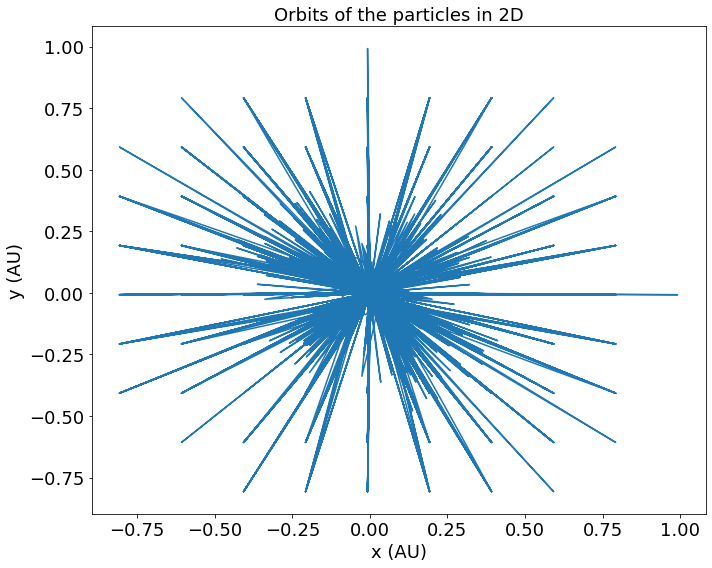

In [17]:
XX1=[]
YY1=[]
n=506
for ni in range(n):
    for counts in range(0,len(rev)-3100):
        x = rev[counts,0][ni]
        y = rev[counts,1][ni]
        XX1.append(x)
        YY1.append(y)
plt.figure(figsize=(10,8))
plt.plot(XX1,YY1)
plt.title("Orbits of the particles in 2D",fontsize=18)
plt.xlabel('x (AU)' , fontsize=18)
plt.ylabel('y (AU)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('orbits-fall506.png')
plt.show()


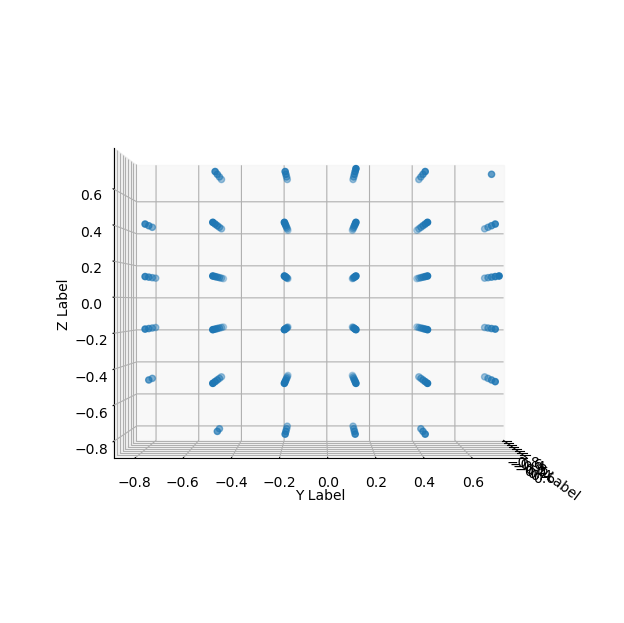

In [24]:
rev = nbody[0]

#for k in range(len(np.arange(0,5000*24*60*60/3.154e7,1*24*60*60/3.154e7))):
xa = rev[1,0]
ya = rev[1,1]
za = rev[1,2]

fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(xa, ya, za)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(elev=0.,azim=0)
plt.show()

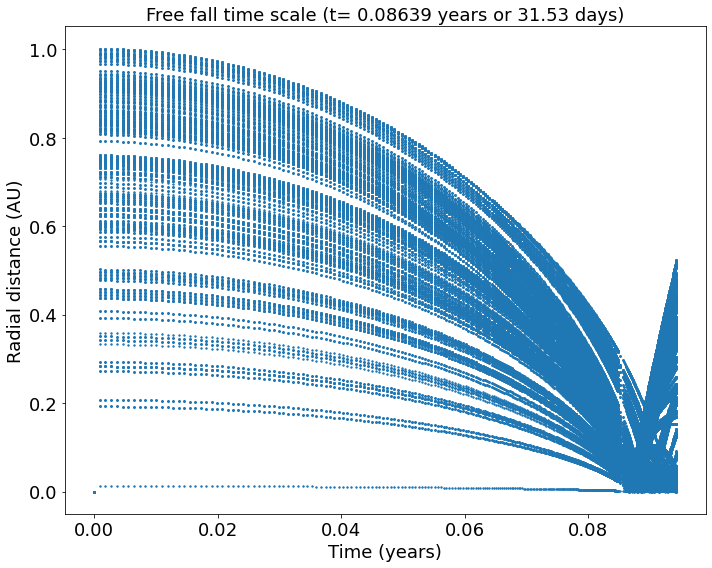

In [16]:
Rma=[]
Tma = []
n = 506
for nums in range(n):
    for counts in range(len(rmags)-3100):
        x = rmags[counts,0][nums]
        y = time[counts]
        Rma.append(x)
        Tma.append(y)

plt.figure(figsize=(10,8))    
plt.scatter(Tma,Rma,s=2)
plt.title("Free fall time scale (t= 0.08639 years or 31.53 days)",fontsize=18)
plt.xlabel('Time (years)' , fontsize=18)
plt.ylabel('Radial distance (AU)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('time-fall.png')
plt.show()

In [19]:
from matplotlib import animation

MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


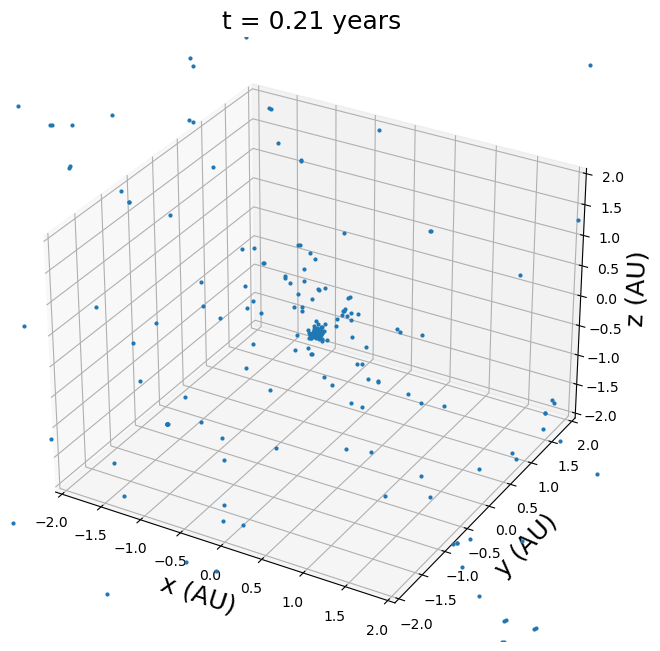

In [20]:
rev = nbody[0]

#for k in range(len(np.arange(0,5000*24*60*60/3.154e7,1*24*60*60/3.154e7))):
xa = rev[0,0]
ya = rev[0,1]
za = rev[0,2]
fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
#sct, = ax.plot([], [], [], "o", markersize=2)
sct, = ax.plot(xa, ya, za, "o", markersize=2)
def update(num, xa, ya, za,sct):
    #xa = rev[int(9*num),0]
    #ya=  rev[int(9*num),1]
    #za = rev[int(9*num),2]
    xa = rev[18*num,0]
    ya=  rev[18*num,1]
    za = rev[18*num,2]
    sct.set_data(xa, ya)
    sct.set_3d_properties(za)
    plt.title('t = '+str(round(time[int(18*num)],2))+ ' years', fontsize=18)
    print(num)
    return sct,
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

ax.set_xlabel('x (AU)',fontsize=18)
ax.set_ylabel('y (AU)',fontsize=18)
ax.set_zlabel('z (AU)',fontsize=18)
ani = animation.FuncAnimation(fig, update, 200, fargs=[xa,ya,za,sct], interval=10,blit=True)
ani.save('test-fall.gif')
plt.show()

In [7]:
import math as mt
rad = 1.0
num = 2
dxl = rad/num

rho=1
G=39.441
tff = mt.sqrt(3*mt.pi/(32*G*rho))
r = np.zeros(shape=(3,5000))
v = np.zeros(shape=(3,5000))
mass = np.zeros(shape=(1,5000))
npp =0
for i in np.arange(-num,num,0.2):
            for j in np.arange(-num,num,0.2):
                for k in np.arange(-num,num,0.2):
                    #rlen = [(2*i-num-1)*dxl,(2*j-num-1)*dxl,(2*k-num-1)*dxl]
                    rlen = [i,j,k]
                    if ( (np.linalg.norm(rlen)<=rad  )  ):
                       
                        r[:,npp] = np.array(rlen)
                        v[:,npp] = np.array([0,0,0])
                        mass[:,npp] = 8*rho*0.1**3
                        npp =npp+1
print((r.shape),npp)

(3, 5000) 506


In [ ]:
# parameters

#(1) L4/L5 short horsehoe: 
    #mass[:,:] = [1,0.001,0]
    #r[:,:] = [[0,1,0.5],[0,0,np.sin(np.pi/3)],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,-vc*np.sin(np.pi/3)],[0,vc,vc/2],[0,0,0]]
  
    #posp = [0,0,0]
    #velp = [0.09,-0.09,0]
    
    #r[:,2] = r[:,2] + posp
    #v[:,2] = v[:,2] + velp
    
    #show for Jupiter and asteroid in rotational and cartesian
    
#(2) L3 long horsehoe:
    #mass[:,:] = [1,0.001,0]
    #r[:,:] = [[0,1,-1],[0,0,0],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,0],[0,vc,-vc],[0,0,0]]
    
    #or
    
    #posp = [0.0,0.0,0]
    #velp = [0.1,-0.1,0]
    
    #r[:,2] = r[:,2] + posp
    #v[:,2] = v[:,2] + velp 
    
    #3d time 
    
#(3) L2/L1 orbit:
    #mass[:,:] = [1,0.001,0]
    #r[:,:] = [[0,1,-1],[0,0,0],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,0],[0,vc,-vc],[0,0,0]]

    

In [ ]:
def func1():
  print('func1: starting')
  for i in xrange(10000000): pass
  print 'func1: finishing'

def func2():
  print 'func2: starting'
  for i in xrange(10000000): pass
  print 'func2: finishing'

if __name__ == '__main__':
  p1 = Process(target=func1)
  p1.start()
  p2 = Process(target=func2)
  p2.start()
  p1.join()
  p2.join()